In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset_sudeste_realista_outliers-2k.csv")

In [3]:
df.head(10)

,id,idade,renda,cidade,categoria,nota,feedback
0,1,80.0,16144.43,Vitória,A,5.4,Bom
1,2,23.0,21789.92,Belo Horizonte,B,7.2,Bom
2,3,23.0,33832.61,Vitória,A,6.5,Bom
3,4,57.0,14540.81,São Paulo,B,9.1,Bom
4,5,59.0,7329.23,São Paulo,B,5.6,Bom
5,6,71.0,5373.65,São Paulo,B,5.2,Bom
6,7,41.0,20266.06,Belo Horizonte,B,9.2,Bom
7,8,40.0,33323.32,Vitória,B,6.1,Bom
8,9,24.0,31285.90,Vitória,A,8.3,Bom
9,10,66.0,42973.59,Belo Horizonte,B,5.8,Bom


In [4]:
print("### Informações gerais do Dataset ###\n")
df.info()

### Informações gerais do Dataset ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2000 non-null   int64  
 1   idade      1981 non-null   float64
 2   renda      1975 non-null   float64
 3   cidade     1975 non-null   object 
 4   categoria  1983 non-null   object 
 5   nota       1976 non-null   float64
 6   feedback   1917 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 109.5+ KB


In [5]:
print("\n### Descrição estatística ###")
print(df.describe())


### Descrição estatística ###
                id        idade         renda         nota
count  2000.000000  1981.000000   1975.000000  1976.000000
mean   1000.500000    48.474003  24252.931534     7.410324
std     577.494589    19.933195  13324.279807     1.503883
min       1.000000     2.000000    491.840000     0.300000
25%     500.750000    32.000000  12790.965000     6.200000
50%    1000.500000    48.000000  24283.510000     7.400000
75%    1500.250000    66.000000  34837.065000     8.700000
max    2000.000000   119.000000  87636.520000    10.000000


In [6]:
print(df.describe(include='all'))

                 id        idade         renda   cidade categoria  \
count   2000.000000  1981.000000   1975.000000     1975      1983   
unique          NaN          NaN           NaN        4         2   
top             NaN          NaN           NaN  Vitória         B   
freq            NaN          NaN           NaN      519      1019   
mean    1000.500000    48.474003  24252.931534      NaN       NaN   
std      577.494589    19.933195  13324.279807      NaN       NaN   
min        1.000000     2.000000    491.840000      NaN       NaN   
25%      500.750000    32.000000  12790.965000      NaN       NaN   
50%     1000.500000    48.000000  24283.510000      NaN       NaN   
75%     1500.250000    66.000000  34837.065000      NaN       NaN   
max     2000.000000   119.000000  87636.520000      NaN       NaN   

               nota feedback  
count   1976.000000     1917  
unique          NaN        1  
top             NaN      Bom  
freq            NaN     1917  
mean       7.410

In [7]:
print("\n### Contagem de valores ausentes ###")
print(df.isnull().sum())


### Contagem de valores ausentes ###
id            0
idade        19
renda        25
cidade       25
categoria    17
nota         24
feedback     83
dtype: int64


In [8]:
I_Q1 = df['idade'].quantile(0.25)
I_Q3 = df['idade'].quantile(0.75)
I_IQR = I_Q3 - I_Q1
limite_inferior_I = I_Q1 - 1.5 * I_IQR
limite_superior_I = I_Q3 + 1.5 * I_IQR

R_Q1 = df['renda'].quantile(0.25)
R_Q3 = df['renda'].quantile(0.75)
R_IQR = R_Q3 - R_Q1
limite_inferior_R = R_Q1 - 1.5 * R_IQR
limite_superior_R = R_Q3 + 1.5 * R_IQR

N_Q1 = df['nota'].quantile(0.25)
N_Q3 = df['nota'].quantile(0.75)
N_IQR = N_Q3 - N_Q1
limite_inferior_N = N_Q1 - 1.5 * N_IQR
limite_superior_N = N_Q3 + 1.5 * N_IQR

In [9]:
print (f"\n\n\t IQR - Campo Idade\n\n")
print(f"Quartis -> Q1: {I_Q1:-8.2f}  ->  Q3: {I_Q3:-8.2f}")
print(f"IQR ----- {I_IQR}")
print(f"Limites - Inf: {limite_inferior_I:-8.2f}  -> Sup: {limite_superior_I:-8.2f}")
print(f"\n\n")

print('\n--------------x--------------\n')

print (f"\n\n\t IQR - Campo Renda\n\n")
print(f"Quartis -> Q1: {R_Q1:-8.2f}  ->  Q3: {R_Q3:-8.2f}")
print(f"IQR ----- {R_IQR}")
print(f"Limites - Inf: {limite_inferior_R:-8.2f}  -> Sup: {limite_superior_R:-8.2f}")
print(f"\n\n")

print('\n--------------x--------------\n')

print (f"\n\n\t IQR - Campo Nota\n\n")
print(f"Quartis -> Q1: {N_Q1:-8.2f}  ->  Q3: {N_Q3:-8.2f}")
print(f"IQR ----- {N_IQR}")
print(f"Limites - Inf: {limite_inferior_N:-8.2f}  -> Sup: {limite_superior_N:-8.2f}")
print(f"\n\n")

print('\n--------------x--------------\n')



	 IQR - Campo Idade


Quartis -> Q1:    32.00  ->  Q3:    66.00
IQR ----- 34.0
Limites - Inf:   -19.00  -> Sup:   117.00




--------------x--------------



	 IQR - Campo Renda


Quartis -> Q1: 12790.97  ->  Q3: 34837.07
IQR ----- 22046.100000000002
Limites - Inf: -20278.19  -> Sup: 67906.21




--------------x--------------



	 IQR - Campo Nota


Quartis -> Q1:     6.20  ->  Q3:     8.70
IQR ----- 2.499999999999999
Limites - Inf:     2.45  -> Sup:    12.45




--------------x--------------



In [10]:
outliers = df[(df['idade'] < limite_inferior_I) | (df['idade'] > limite_superior_I)]
print(f"\n### Possíveis outliers em 'idade' ###\n\n{outliers}\n")

outliers = df[(df['renda'] < limite_inferior_R) | (df['renda'] > limite_superior_R)]
print(f"\n### Possíveis outliers em 'renda' ###\n\n{outliers}\n")

outliers = df[(df['nota'] < limite_inferior_N) | (df['nota'] > limite_superior_N)]
print(f"\n### Possíveis outliers em 'nota' ###\n\n{outliers}\n")


### Possíveis outliers em 'idade' ###

      id  idade     renda          cidade categoria  nota feedback
204  205  119.0    491.84  Belo Horizonte         A   2.4      Bom
943  944  119.0  51870.74       São Paulo         A   3.5      Bom


### Possíveis outliers em 'renda' ###

        id  idade     renda          cidade categoria  nota feedback
295    296   13.0  73869.81  Belo Horizonte         B   4.5      Bom
460    461   14.0  73680.53         Vitória         B   4.9      Bom
1048  1049    3.0  87636.52  Belo Horizonte         B   3.2      Bom
1386  1387    7.0  67942.96       São Paulo         B   1.3      Bom
1518  1519   89.0  75951.89  Rio de Janeiro         A   4.8      Bom
1840  1841  105.0  85033.57         Vitória         A   4.4      Bom
1869  1870  108.0  78989.51       São Paulo         A   3.8      Bom


### Possíveis outliers em 'nota' ###

        id  idade     renda          cidade categoria  nota feedback
204    205  119.0    491.84  Belo Horizonte         A   2

In [11]:
mean_idade = df['idade'].mean()
median_nota = df['nota'].median()
median_renda = df['renda'].median()

In [12]:
print(f"Media das Idades {mean_idade}")
print(f"Media das Notas {median_nota}")
print(f"Mediana das Rendas {median_renda} - {median_renda:.2f}")

Media das Idades 48.474003028773346
Media das Notas 7.4
Mediana das Rendas 24283.51 - 24283.51


In [13]:
df['idade'] = df['idade'].fillna(mean_idade)
df['nota'] = df['nota'].fillna(median_nota)
df['renda'] = df['renda'].fillna(median_renda)

In [14]:
df['cidade'] = df['cidade'].fillna("Desconhecido")
df['feedback'] = df['feedback'].fillna("Desconhecido")

In [15]:
df['categoria'] = (
    df['categoria']
        .replace(r'^\s*$', np.nan, regex=True)   
        .str.strip()                             
)

moda = df['categoria'].mode().iloc[0]

df['categoria'] = df['categoria'].fillna(moda)

In [16]:
df.head(10)

,id,idade,renda,cidade,categoria,nota,feedback
0,1,80.0,16144.43,Vitória,A,5.4,Bom
1,2,23.0,21789.92,Belo Horizonte,B,7.2,Bom
2,3,23.0,33832.61,Vitória,A,6.5,Bom
3,4,57.0,14540.81,São Paulo,B,9.1,Bom
4,5,59.0,7329.23,São Paulo,B,5.6,Bom
5,6,71.0,5373.65,São Paulo,B,5.2,Bom
6,7,41.0,20266.06,Belo Horizonte,B,9.2,Bom
7,8,40.0,33323.32,Vitória,B,6.1,Bom
8,9,24.0,31285.90,Vitória,A,8.3,Bom
9,10,66.0,42973.59,Belo Horizonte,B,5.8,Bom


In [17]:
print(df.isnull().sum())

id           0
idade        0
renda        0
cidade       0
categoria    0
nota         0
feedback     0
dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2000 non-null   int64  
 1   idade      2000 non-null   float64
 2   renda      2000 non-null   float64
 3   cidade     2000 non-null   object 
 4   categoria  2000 non-null   object 
 5   nota       2000 non-null   float64
 6   feedback   2000 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 109.5+ KB


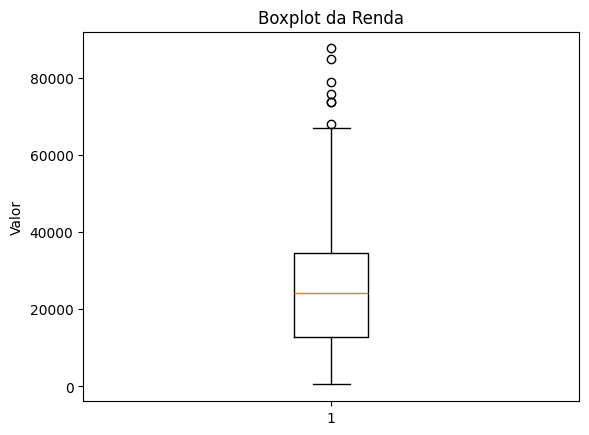

In [19]:
plt.boxplot(df['renda'])
plt.title("Boxplot da Renda")
plt.ylabel("Valor")
plt.show()

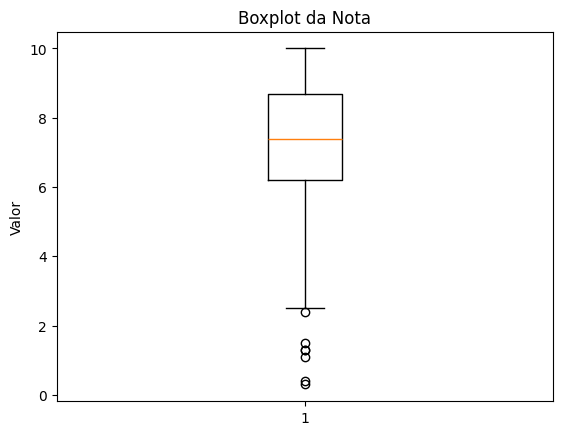

In [20]:
plt.boxplot(df['nota'])
plt.title("Boxplot da Nota")
plt.ylabel("Valor")
plt.show()

In [21]:
df_clean = df[(df['renda'] >= limite_inferior_R) & (df['renda'] <= limite_superior_R)].copy()

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1993 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1993 non-null   int64  
 1   idade      1993 non-null   float64
 2   renda      1993 non-null   float64
 3   cidade     1993 non-null   object 
 4   categoria  1993 non-null   object 
 5   nota       1993 non-null   float64
 6   feedback   1993 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 124.6+ KB


In [23]:
outliers_v2 = df_clean[(df_clean['renda'] < limite_inferior_R) | (df_clean['renda'] > limite_superior_R)]
print(f"\n### Possíveis outliers em 'renda' ###\n\n{outliers_v2}\n")


### Possíveis outliers em 'renda' ###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []



In [24]:
df_encoded = pd.get_dummies(df, columns=['cidade','categoria','feedback'], drop_first=False)

In [25]:
df_encoded_v2 = pd.get_dummies(
    df, 
    columns=['cidade', 'categoria', 'feedback'], 
    drop_first=False,
    dtype=int  
)

In [26]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   idade                  2000 non-null   float64
 2   renda                  2000 non-null   float64
 3   nota                   2000 non-null   float64
 4   cidade_Belo Horizonte  2000 non-null   bool   
 5   cidade_Desconhecido    2000 non-null   bool   
 6   cidade_Rio de Janeiro  2000 non-null   bool   
 7   cidade_São Paulo       2000 non-null   bool   
 8   cidade_Vitória         2000 non-null   bool   
 9   categoria_A            2000 non-null   bool   
 10  categoria_B            2000 non-null   bool   
 11  feedback_Bom           2000 non-null   bool   
 12  feedback_Desconhecido  2000 non-null   bool   
dtypes: bool(9), float64(3), int64(1)
memory usage: 80.2 KB


In [27]:
df_encoded_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   idade                  2000 non-null   float64
 2   renda                  2000 non-null   float64
 3   nota                   2000 non-null   float64
 4   cidade_Belo Horizonte  2000 non-null   int64  
 5   cidade_Desconhecido    2000 non-null   int64  
 6   cidade_Rio de Janeiro  2000 non-null   int64  
 7   cidade_São Paulo       2000 non-null   int64  
 8   cidade_Vitória         2000 non-null   int64  
 9   categoria_A            2000 non-null   int64  
 10  categoria_B            2000 non-null   int64  
 11  feedback_Bom           2000 non-null   int64  
 12  feedback_Desconhecido  2000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 203.3 KB


In [28]:
df_encoded.head(15)

,id,idade,renda,nota,cidade_Belo Horizonte,cidade_Desconhecido,cidade_Rio de Janeiro,cidade_São Paulo,cidade_Vitória,categoria_A,categoria_B,feedback_Bom,feedback_Desconhecido
0,1,80.0,16144.43,5.4,False,False,False,False,True,True,False,True,False
1,2,23.0,21789.92,7.2,True,False,False,False,False,False,True,True,False
2,3,23.0,33832.61,6.5,False,False,False,False,True,True,False,True,False
3,4,57.0,14540.81,9.1,False,False,False,True,False,False,True,True,False
4,5,59.0,7329.23,5.6,False,False,False,True,False,False,True,True,False
5,6,71.0,5373.65,5.2,False,False,False,True,False,False,True,True,False
6,7,41.0,20266.06,9.2,True,False,False,False,False,False,True,True,False
7,8,40.0,33323.32,6.1,False,False,False,False,True,False,True,True,False
8,9,24.0,31285.90,8.3,False,False,False,False,True,True,False,True,False
9,10,66.0,42973.59,5.8,True,False,False,False,False,False,True,True,False


In [29]:
df_encoded_v2.head(10)

,id,idade,renda,nota,cidade_Belo Horizonte,cidade_Desconhecido,cidade_Rio de Janeiro,cidade_São Paulo,cidade_Vitória,categoria_A,categoria_B,feedback_Bom,feedback_Desconhecido
0,1,80.0,16144.43,5.4,0,0,0,0,1,1,0,1,0
1,2,23.0,21789.92,7.2,1,0,0,0,0,0,1,1,0
2,3,23.0,33832.61,6.5,0,0,0,0,1,1,0,1,0
3,4,57.0,14540.81,9.1,0,0,0,1,0,0,1,1,0
4,5,59.0,7329.23,5.6,0,0,0,1,0,0,1,1,0
5,6,71.0,5373.65,5.2,0,0,0,1,0,0,1,1,0
6,7,41.0,20266.06,9.2,1,0,0,0,0,0,1,1,0
7,8,40.0,33323.32,6.1,0,0,0,0,1,0,1,1,0
8,9,24.0,31285.90,8.3,0,0,0,0,1,1,0,1,0
9,10,66.0,42973.59,5.8,1,0,0,0,0,0,1,1,0


In [30]:
numeric_cols = ['idade', 'renda', 'nota']
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [31]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   idade                  2000 non-null   float64
 2   renda                  2000 non-null   float64
 3   nota                   2000 non-null   float64
 4   cidade_Belo Horizonte  2000 non-null   bool   
 5   cidade_Desconhecido    2000 non-null   bool   
 6   cidade_Rio de Janeiro  2000 non-null   bool   
 7   cidade_São Paulo       2000 non-null   bool   
 8   cidade_Vitória         2000 non-null   bool   
 9   categoria_A            2000 non-null   bool   
 10  categoria_B            2000 non-null   bool   
 11  feedback_Bom           2000 non-null   bool   
 12  feedback_Desconhecido  2000 non-null   bool   
dtypes: bool(9), float64(3), int64(1)
memory usage: 80.2 KB


In [32]:
df_encoded.head(10)

,id,idade,renda,nota,cidade_Belo Horizonte,cidade_Desconhecido,cidade_Rio de Janeiro,cidade_São Paulo,cidade_Vitória,categoria_A,categoria_B,feedback_Bom,feedback_Desconhecido
0,1,1.589550,-0.612574,-1.345106,False,False,False,False,True,True,False,True,False
1,2,-1.284407,-0.186094,-0.140653,True,False,False,False,False,False,True,True,False
2,3,-1.284407,0.723655,-0.609051,False,False,False,False,True,True,False,True,False
3,4,0.429883,-0.733717,1.130713,False,False,False,True,False,False,True,True,False
4,5,0.530724,-1.278506,-1.211278,False,False,False,True,False,False,True,True,False
5,6,1.135768,-1.426238,-1.478934,False,False,False,True,False,False,True,True,False
6,7,-0.376842,-0.301211,1.197627,True,False,False,False,False,False,True,True,False
7,8,-0.427262,0.685181,-0.876708,False,False,False,False,True,False,True,True,False
8,9,-1.233987,0.531267,0.595401,False,False,False,False,True,True,False,True,False
9,10,0.883666,1.414197,-1.077450,True,False,False,False,False,False,True,True,False
